<a href="https://colab.research.google.com/github/alyplyp/ImageProcessingF55122019/blob/main/Image_Processing_F55122019_Ahmad_Alief_Firnas_Hasyimi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import library OpenCV, NumPy, Matplotlib, dan Random

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

1. Baca gambar menggunakan opencv atau PIL

Membaca gambar dengan metode imread dan direktori gambar

In [10]:
image = cv2.imread('plat.jpeg')

2. Lakukan edge detection menggunakan Sobel dan Canny

gambar diubah menjadi abu-abu, lalu pada metode sobel, gambar di output menjadi 64-bit, parameter ketiga dan keempat adalah urutan x dan y, dan ksize adalah ukuran kernel deteksi gambar
pada metode canny, dimasukkan 100 untuk input warna abu-abu, 200 untuk ambang bawah, semua warna dibawah 200 diabaikan

In [11]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
sobel_edges = cv2.Sobel(gray_image, cv2.CV_64F, 1, 1, ksize=5)
canny_edges = cv2.Canny(gray_image, 100, 200)

3. Lakukan cropping: random cropping dan half-size center cropping

random crop mengambil angka acak .randint untuk x dan y gambar, dan gambar di crop sesuai ukuran x dan y, dicrop kembali dengan ukuran 200x200 piksel

half size crop menghitung koordinat tengah gambar dari x dan y, dan gambar di crop setengah dari ukuran awal

In [13]:
def random_crop(image, crop_size):
    height, width = image.shape[:2]
    x = random.randint(0, width - crop_size[1])
    y = random.randint(0, height - crop_size[0])
    cropped_image = image[y:y+crop_size[0], x:x+crop_size[1]]
    return cropped_image

center_x = image.shape[1] // 4
center_y = image.shape[0] // 4
half_size_center_cropped_image = image[center_y:3*center_y, center_x:3*center_x]

4. Lakukan transformasi pada gambar: putih jadi hitam, hitam jadi putih

gambar di invert menggunakan metode bitwise not dari opencv

In [20]:
inverted_image = cv2.bitwise_not(image)



5. tambahkan noise pada gambar original: salt and pepper noise dan gaussian

membuat fungsi masing-masing untuk gaussian dan salt and pepper,
salt and pepper mengambil amount sebesar 0.02
gaussian mengambil mean 0 dan sigma 25

amount + ukuran gambar * 0.5 dibulatkan dan dijadikan nilai num_salt, nilai random digunakan untuk mengisi piksel gambar dengan num_salt

gaussian noise dibuat menggunakan mean dan sigma dan hasilnya dikonversi menjadi uint8

noise kemudian digabung ke dalam gambar

In [16]:
def add_salt_and_pepper_noise(image, amount=0.02):
    row, col, _ = image.shape
    num_salt = np.ceil(amount * image.size * 0.5)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    image[coords[0], coords[1], :] = 1

def add_gaussian_noise(image, mean=0, sigma=25):
    gaussian_noise = np.random.normal(mean, sigma, image.shape).astype('uint8')
    noisy_image = cv2.add(image, gaussian_noise)
    return noisy_image

salt_and_pepper_noisy_image = image.copy()
add_salt_and_pepper_noise(salt_and_pepper_noisy_image)

gaussian_noisy_image = add_gaussian_noise(image)

6. Lakukan transformasi geometri: rotasi, flip vertikal dan horizontal

rotasi dilakukan dengan menggunakan perintah rotate dengan parameter sudut dan arahnya

flip dilakukan dengan menggunakan perintah flip dengan parameter 0 untuk vertikal, dan 1 untuk horizontal

In [17]:
rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

vertical_flip = cv2.flip(image, 0)

horizontal_flip = cv2.flip(image, 1)

mengatur tabel subplot sebanyak 3x4 dengan ukuran 12x8

menampilkan setiap gambar dalam kolom dengan gambar dan title yang benar, untuk bagian berwarna, warna diubah dari BGR menjadi RGB, axis diatur menjadi off agar tidak muncul angka diagram

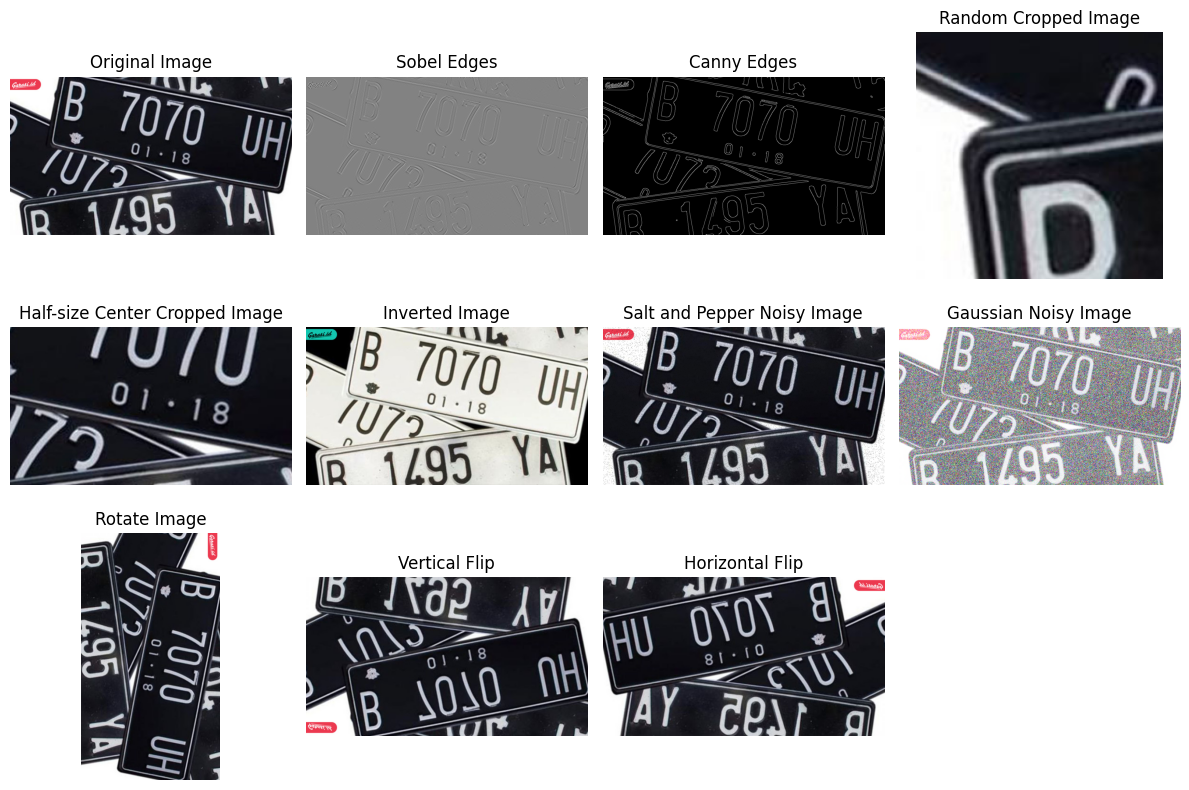

In [22]:
num_rows = 3
num_cols = 4
plt.figure(figsize=(12, 8))

plt.subplot(num_rows, num_cols, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(num_rows, num_cols, 2)
plt.imshow(sobel_edges, cmap='gray')
plt.title('Sobel Edges')
plt.axis('off')

plt.subplot(num_rows, num_cols, 3)
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')

plt.subplot(num_rows, num_cols, 4)
plt.imshow(cv2.cvtColor(random_cropped_image, cv2.COLOR_BGR2RGB))
plt.title('Random Cropped Image')
plt.axis('off')

plt.subplot(num_rows, num_cols, 5)
plt.imshow(cv2.cvtColor(half_size_center_cropped_image, cv2.COLOR_BGR2RGB))
plt.title('Half-size Center Cropped Image')
plt.axis('off')

plt.subplot(num_rows, num_cols, 6)
plt.imshow(cv2.cvtColor(inverted_image, cv2.COLOR_BGR2RGB))
plt.title('Inverted Image')
plt.axis('off')


plt.subplot(num_rows, num_cols, 7)
plt.imshow(cv2.cvtColor(salt_and_pepper_noisy_image, cv2.COLOR_BGR2RGB))
plt.title('Salt and Pepper Noisy Image')
plt.axis('off')

plt.subplot(num_rows, num_cols, 8)
plt.imshow(cv2.cvtColor(gaussian_noisy_image, cv2.COLOR_BGR2RGB))
plt.title('Gaussian Noisy Image')
plt.axis('off')

plt.subplot(num_rows, num_cols, 9)
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.title('Rotate Image')
plt.axis('off')

plt.subplot(num_rows, num_cols, 10)
plt.imshow(cv2.cvtColor(vertical_flip, cv2.COLOR_BGR2RGB))
plt.title('Vertical Flip')
plt.axis('off')

plt.subplot(num_rows, num_cols, 11)
plt.imshow(cv2.cvtColor(horizontal_flip, cv2.COLOR_BGR2RGB))
plt.title('Horizontal Flip')
plt.axis('off')

plt.tight_layout()
plt.show()